<a href="https://colab.research.google.com/github/tpiedrahita-byte/sys2025/blob/main/Taller_2_SYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- This cell will serve as the cover page for the notebook. -->
# Taller 2 Señales y Sistemas

### Puntos Cubiertos: 2.6 - 2.14

**Estudiante:** Thomas Piedrahita Jaramillo

**Profesor:** Andres Marino Alvarez Meza

In [1]:

# Importamos las librerías necesarias
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

# Configuración para una visualización más agradable de las ecuaciones
sym.init_printing()

# Definición de símbolos clave para el análisis
# t: tiempo (variable real en el dominio temporal)
# s: frecuencia compleja (variable compleja en el dominio de Laplace)
# s0: constante genérica para exponentes o polos
t, s, s0 = sym.symbols('t s s0', real=True)
j = sym.I # La unidad imaginaria en SymPy

print("✅ Configuración lista para el Taller de Transformada de Laplace.")
print("Ahora estamos listos para realizar los ejercicios.")

✅ Configuración lista para el Taller de Transformada de Laplace.
Ahora estamos listos para realizar los ejercicios.


In [6]:
# --- PUNTO 2.6: Ejercicios del Cuaderno de Definición ---

# 1. Transformada de Laplace de un Impulso de Dirac
# La teoría nos dice que L{delta(t)} = 1. Vamos a comprobarlo con SymPy.

t = sym.symbols('t', real=True)
s = sym.symbols('s', complex=True)

# Calculamos la integral de definición: integral(delta(t) * e^(-st)) entre -inf e inf
X_dirac = sym.integrate(sym.DiracDelta(t) * sym.exp(-s * t), (t, -sym.oo, sym.oo))

print("Transformada de Laplace del Impulso de Dirac delta(t):")
display(X_dirac)

Transformada de Laplace del Impulso de Dirac delta(t):


1

In [7]:
# 2. Transformada de una señal exponencial compleja causal
# Señal: x(t) = exp(-s0 * t) * u(t)

s0 = sym.symbols('s0', complex=True)

# Usamos la función laplace_transform de SymPy
# Devuelve una tupla: (Transformada, ROC_condición, Condición_auxiliar)
X_exp, a, cond = sym.laplace_transform(sym.exp(-s0 * t), t, s)

print("Transformada de Laplace de e^(-s0*t):")
display(X_exp)

print(f"\nRegión de Convergencia (ROC): Re(s) > {a}")

Transformada de Laplace de e^(-s0*t):


  1   
──────
s + s₀


Región de Convergencia (ROC): Re(s) > -re(s0)


In [8]:
# 3. EJERCICIO: Obtener X(s) y ROC a partir del diagrama de polos y ceros
# Instrucciones: Mira la gráfica 'pz_plot.png' en el material teórico y
# reemplaza los valores en las listas 'polos' y 'ceros' abajo.

# --- ZONA EDITABLE ---
# Ejemplo: si ves 'x' en -1 y -2, pon: polos = [-1, -2]
# Ejemplo: si ves 'o' en 0, pon: ceros = [0]
polos_visuales = [-1 + sym.I, -1 - sym.I]  # <--- Reemplaza con lo que veas en la gráfica
ceros_visuales = [0]                       # <--- Reemplaza con lo que veas en la gráfica
Ganancia_K = 1                             # Asumimos ganancia unitaria si no se especifica
# ---------------------

# Construcción de X(s) a partir de polos y ceros
# X(s) = K * prod(s - cero) / prod(s - polo)
numerador = Ganancia_K
for z in ceros_visuales:
    numerador *= (s - z)

denominador = 1
max_polo_real = -sym.oo # Para encontrar la ROC
for p in polos_visuales:
    denominador *= (s - p)
    if sym.re(p) > max_polo_real:
        max_polo_real = sym.re(p)

X_recuperada = numerador / denominador

print("Función de Transferencia X(s) recuperada del gráfico:")
display(X_recuperada)

print("\nRegión de Convergencia (ROC) asumiendo señal causal:")
print(f"Re(s) > {max_polo_real}")

Función de Transferencia X(s) recuperada del gráfico:


           s           
───────────────────────
(s + 1 - ⅈ)⋅(s + 1 + ⅈ)


Región de Convergencia (ROC) asumiendo señal causal:
Re(s) > -1


Graficando magnitud para s0 = 1 + I...
Observa el 'pico' que indica la ubicación del polo.


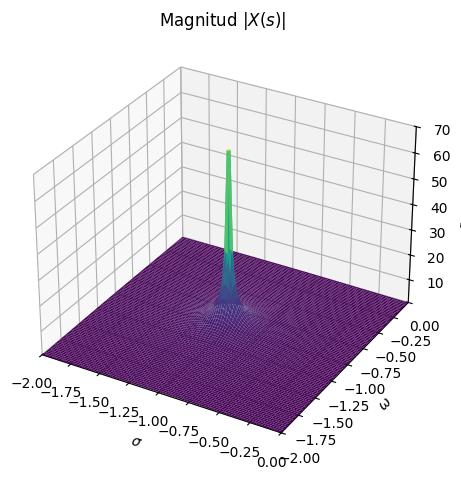

In [9]:
# 4. Ilustración 3D de la magnitud |X(s)|
# Usaremos el resultado de la exponencial (X_exp) sustituyendo s0 por un valor concreto.

sigma, omega = sym.symbols('sigma omega')

# Definimos un valor concreto para s0, por ejemplo 1 + j
valor_s0 = 1 + sym.I
X_eval = X_exp.subs(s0, valor_s0)

# Sustituimos s = sigma + j*omega para poder graficar en 3D
X_func_3d = X_eval.subs(s, sigma + sym.I * omega)

print(f"Graficando magnitud para s0 = {valor_s0}...")
print("Observa el 'pico' que indica la ubicación del polo.")

# Gráfico 3D usando SymPy plotting
p1 = sym.plotting.plot3d(sym.Abs(X_func_3d),
                         (sigma, -2, 0),
                         (omega, -2, 0),
                         xlabel=r'$\sigma$',
                         ylabel=r'$\omega$',
                         title=r'Magnitud $|X(s)|$',
                         show=True)

La transformada X(s) para w0 = 2 es: 2 / s**2 + 4
--------------------------------------------------
Polos (Raíces de s^2 + 4 = 0):
{-2*I: 1, 2*I: 1}

Ceros (Raíces del numerador, si existen):
{}


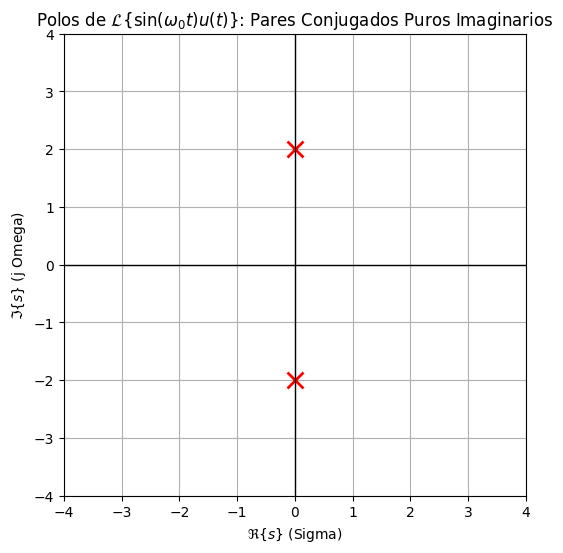


Análisis de Simetría:
Los polos son puramente imaginarios: +j2 y -j2 (para w0=2).
Esto confirma la propiedad de simetría para señales reales: los polos complejos siempre aparecen en pares conjugados.


In [10]:
#  Ejercicio 2.7 - Polos y Ceros de la Transformada del Seno

# La Transformada de Laplace del Seno es: X(s) = w0 / (s^2 + w0^2)
# Vamos a encontrar sus polos y verificar la simetría conjugada.

# --- 1. Definición de la Función y Parámetros ---
# Usaremos w0 = 2 rad/s como ejemplo
w0_val = 2
s_expr = s**2 + w0_val**2
X_seno_num = w0_val
X_seno_den = s_expr

# --- 2. Cálculo de Polos y Ceros ---
# Los polos son las raíces del denominador: s^2 + w0^2 = 0
polos_seno = sym.roots(X_seno_den, s)

# Los ceros son las raíces del numerador. Como es una constante (w0_val), no hay ceros finitos.
ceros_seno = sym.roots(X_seno_num, s)

print(f"La transformada X(s) para w0 = {w0_val} es: {X_seno_num} / {X_seno_den}")
print("-" * 50)
print(f"Polos (Raíces de s^2 + {w0_val**2} = 0):")
print(polos_seno)
print(f"\nCeros (Raíces del numerador, si existen):")
print(ceros_seno)
# Los polos son: s = +j*w0 y s = -j*w0

# --- 3. Graficación para verificar Simetría ---
# Definimos la función de ploteo para el plano s
def pole_zero_plot(poles, zeros, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))

    # Extraer los valores de las raíces (claves del diccionario)
    pole_vals = list(poles.keys())
    zero_vals = list(zeros.keys())

    # Graficar polos (x)
    for p in pole_vals:
        ax.plot(complex(p).real, complex(p).imag, 'rx', markersize=12, mew=2)

    # Graficar ceros (o)
    for z in zero_vals:
        ax.plot(complex(z).real, complex(z).imag, 'bo', markersize=10, mfc='none', mew=2)

    ax.set_aspect('equal')
    ax.axhline(0, color='black', lw=1)
    ax.axvline(0, color='black', lw=1)
    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])
    ax.set_xlabel(r'$\Re\{s\}$ (Sigma)')
    ax.set_ylabel(r'$\Im\{s\}$ (j Omega)')
    ax.set_title(r'Polos de $\mathcal{L}\{\sin(\omega_0 t) u(t)\}$: Pares Conjugados Puros Imaginarios')
    ax.grid(True)
    plt.show()

# Llamamos a la función de graficado
pole_zero_plot(polos_seno, ceros_seno)

# Conclusión
print("\nAnálisis de Simetría:")
print("Los polos son puramente imaginarios: +j2 y -j2 (para w0=2).")
print("Esto confirma la propiedad de simetría para señales reales: los polos complejos siempre aparecen en pares conjugados.")

#  Ejercicio 2.8: Demostración de Propiedades de la Transformada de Laplace

Este ejercicio requiere la demostración formal de las propiedades básicas a partir de la definición de la **Transformada de Laplace Bilateral**:

$$\mathcal{L}\{x(t)\} = X(s) = \int_{-\infty}^{\infty} x(t) e^{-st} dt$$

---

## i) Desplazamiento Temporal: $\mathcal{L}\{x(t-t_0)\} = e^{-st_0}X(s)$

1.  **Definición:** Aplicamos la transformada al lado izquierdo:
    $$\mathcal{L}\{x(t-t_0)\} = \int_{-\infty}^{\infty} x(t-t_0) e^{-st} dt$$

2.  **Sustitución:** Hacemos un cambio de variable:
    * Sea $\tau = t - t_0$.
    * Entonces $t = \tau + t_0$ y $d t = d \tau$.
    * Los límites de integración permanecen iguales ($\pm \infty$).

3.  **Reemplazo:** Sustituimos $\tau$ y $t$:
    $$\int_{-\infty}^{\infty} x(\tau) e^{-s(\tau + t_0)} d\tau$$

4.  **Separación Exponencial:** Usamos la propiedad $e^{a+b} = e^a e^b$:
    $$\int_{-\infty}^{\infty} x(\tau) e^{-s\tau} e^{-st_0} d\tau$$

5.  **Factor Común:** Como $e^{-st_0}$ no depende de $\tau$, puede salir de la integral:
    $$e^{-st_0} \int_{-\infty}^{\infty} x(\tau) e^{-s\tau} d\tau$$

6.  **Conclusión:** La integral restante es, por definición, $X(s)$:
    $$\mathcal{L}\{x(t-t_0)\} = e^{-st_0} X(s)$$

---

## ii) Escalamiento Temporal: $\mathcal{L}\{x(at)\} = \frac{1}{|a|} X(\frac{s}{a})$

1.  **Definición:** Aplicamos la transformada al lado izquierdo:
    $$\mathcal{L}\{x(a t)\} = \int_{-\infty}^{\infty} x(a t) e^{-st} dt$$

2.  **Sustitución:** Hacemos un cambio de variable:
    * Sea $\tau = a t$.
    * Entonces $t = \frac{\tau}{a}$ y $d t = \frac{1}{a} d \tau$.
    * **Manejo de límites:**
        * Si $a > 0$, los límites no cambian: $\int_{-\infty}^{\infty}$.
        * Si $a < 0$, los límites se invierten (de $\infty$ a $-\infty$), lo que añade un signo negativo.

3.  **Caso $a > 0$:**
    $$\int_{-\infty}^{\infty} x(\tau) e^{-s(\tau/a)} \frac{1}{a} d\tau = \frac{1}{a} \int_{-\infty}^{\infty} x(\tau) e^{-(s/a)\tau} d\tau$$
    * Esto es $\frac{1}{a} X(\frac{s}{a})$.

4.  **Caso $a < 0$:**
    $$\int_{\infty}^{-\infty} x(\tau) e^{-s(\tau/a)} \frac{1}{a} d\tau = -\frac{1}{a} \int_{\infty}^{-\infty} x(\tau) e^{-(s/a)\tau} d\tau$$
    * Invertimos los límites y usamos el signo negativo:
        $$-\frac{1}{a} \left( -\int_{-\infty}^{\infty} x(\tau) e^{-(s/a)\tau} d\tau \right) = \frac{1}{-a} X(\frac{s}{a})$$

5.  **Conclusión Unificada:** Como $\frac{1}{a}$ para $a>0$ y $\frac{1}{-a}$ para $a<0$ pueden unificarse en $\frac{1}{|a|}$:
    $$\mathcal{L}\{x(a t)\} = \frac{1}{|a|} X(\frac{s}{a})$$

---

## iii) Diferenciación en el Tiempo: $\mathcal{L}\{\frac{d x(t)}{d t}\} = sX(s) - x(0^-)$ (Unilateral)

Para la demostración, utilizaremos la **Transformada de Laplace Unilateral**, que es la más común en sistemas y circuitos:
$$\mathcal{L}\{x(t)\} = \int_{0^{-}}^{\infty} x(t) e^{-st} dt$$

1.  **Definición:** Aplicamos la transformada al lado izquierdo:
    $$\mathcal{L}\{\frac{d x(t)}{d t}\} = \int_{0^{-}}^{\infty} \frac{d x(t)}{d t} e^{-st} dt$$

2.  **Integración por Partes:** Usamos la fórmula $\int u dv = uv - \int v du$.
    * Sea $u = e^{-st} \implies du = -s e^{-st} dt$.
    * Sea $dv = \frac{d x(t)}{d t} dt \implies v = x(t)$.

3.  **Aplicación de la fórmula:**
    $$\mathcal{L}\{\frac{d x(t)}{d t}\} = \left[ x(t) e^{-st} \right]_{0^{-}}^{\infty} - \int_{0^{-}}^{\infty} x(t) (-s e^{-st}) dt$$

4.  **Evaluación del primer término:**
    $$\left[ x(t) e^{-st} \right]_{0^{-}}^{\infty} = \lim_{t \to \infty} x(t) e^{-st} - x(0^{-}) e^{-s \cdot 0}$$
    * Asumiendo que $x(t) e^{-st} \to 0$ cuando $t \to \infty$ (condición de convergencia), y sabiendo que $e^0 = 1$:
        $$0 - x(0^{-}) = -x(0^{-})$$

5.  **Evaluación del segundo término:**
    $$- \int_{0^{-}}^{\infty} x(t) (-s e^{-st}) dt = s \int_{0^{-}}^{\infty} x(t) e^{-st} dt$$
    * La integral restante es $X(s)$.

6.  **Conclusión:** Uniendo ambos resultados:
    $$\mathcal{L}\{\frac{d x(t)}{d t}\} = -x(0^{-}) + s X(s) = s X(s) - x(0^{-})$$

---

## iv) Teorema de la Convolución: $\mathcal{L}\{x(t) * y(t)\} = X(s)Y(s)$

1.  **Definición:** Aplicamos la transformada a la convolución, usando la integral de convolución:
    $$\mathcal{L}\{x(t) * y(t)\} = \int_{-\infty}^{\infty} \left[ \int_{-\infty}^{\infty} x(\tau) y(t-\tau) d\tau \right] e^{-st} dt$$

2.  **Reordenamiento de Integrales:** Intercambiamos el orden de integración (Teorema de Fubini):
    $$\int_{-\infty}^{\infty} x(\tau) \left[ \int_{-\infty}^{\infty} y(t-\tau) e^{-st} dt \right] d\tau$$

3.  **Identificación de Desplazamiento:** Analizamos la integral interna. Es la transformada de Laplace de $y(t-\tau)$, que por la propiedad de desplazamiento temporal (demostrada en i) es:
    $$\mathcal{L}\{y(t-\tau)\} = e^{-s\tau} Y(s)$$

4.  **Sustitución:** Reemplazamos el resultado en la ecuación principal:
    $$\int_{-\infty}^{\infty} x(\tau) \left[ e^{-s\tau} Y(s) \right] d\tau$$

5.  **Factor Común:** Como $Y(s)$ no depende de $\tau$, puede salir de la integral:
    $$Y(s) \int_{-\infty}^{\infty} x(\tau) e^{-s\tau} d\tau$$

6.  **Conclusión:** La integral restante es, por definición, $X(s)$:
    $$\mathcal{L}\{x(t) * y(t)\} = X(s) Y(s)$$

i) Transformada de Laplace X(s):


    2⋅s + 5    
───────────────
(s + 2)⋅(s + 3)

Polos: {-2: 1, -3: 1}
Ceros: {-5/2: 1}
ROC: Re{s} > -2


<Figure size 600x400 with 0 Axes>

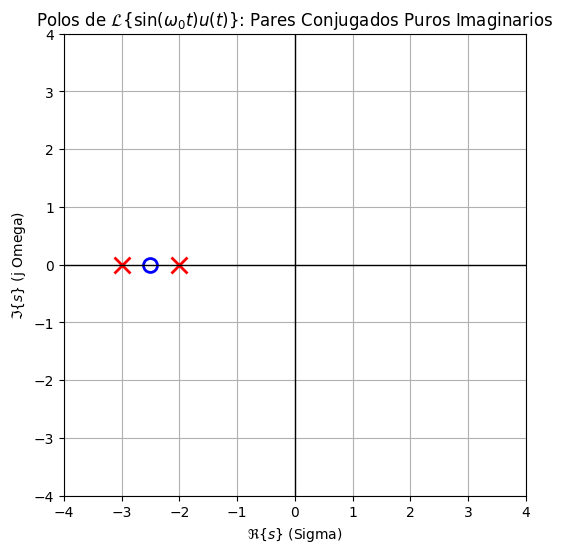

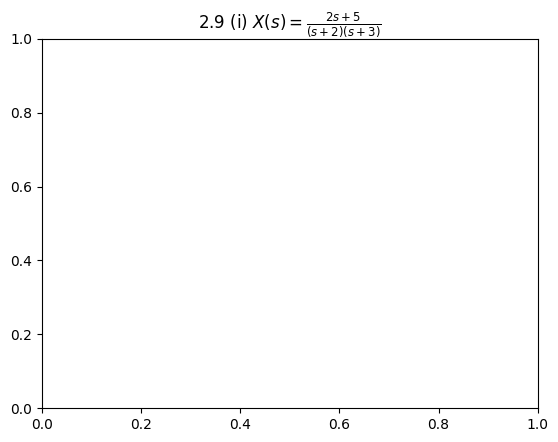

In [12]:
#  Solución 2.9 (i)
# x(t) = e^(-2t)u(t) + e^(-3t)u(t)

# Definición de las transformadas individuales
X1 = 1 / (s + 2)
X2 = 1 / (s + 3)

# Transformada total
X_i = sym.simplify(X1 + X2)
X_i_num = sym.numer(X_i)
X_i_den = sym.denom(X_i)

# Cálculo de polos y ceros
polos_i = sym.roots(X_i_den, s)
ceros_i = sym.roots(X_i_num, s)

print("i) Transformada de Laplace X(s):")
display(X_i)
print(f"Polos: {polos_i}")
print(f"Ceros: {ceros_i}")
print("ROC: Re{s} > -2")

# Graficar Polos y Ceros
plt.figure(figsize=(6, 4))
pole_zero_plot(polos_i, ceros_i)
plt.title(r'2.9 (i) $X(s) = \frac{2s+5}{(s+2)(s+3)}$')
plt.show() #

ii) Transformada de Laplace X(s):


       5       
───────────────
(s - 2)⋅(s + 3)

Polos: {2: 1, -3: 1}
Ceros: {}
ROC: Re{s} > 2 INTERSECT Re{s} < -3
⚠️ Conclusión: La Transformada de Laplace NO EXISTE para esta señal, ya que sus ROCs no se intersectan (Conjunto Vacío).


<Figure size 600x400 with 0 Axes>

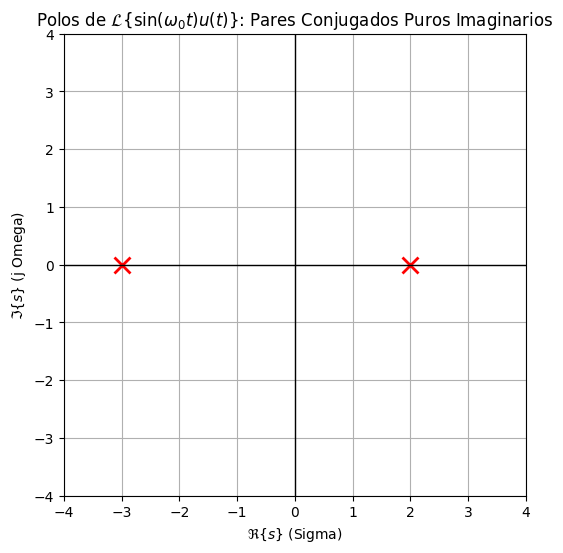

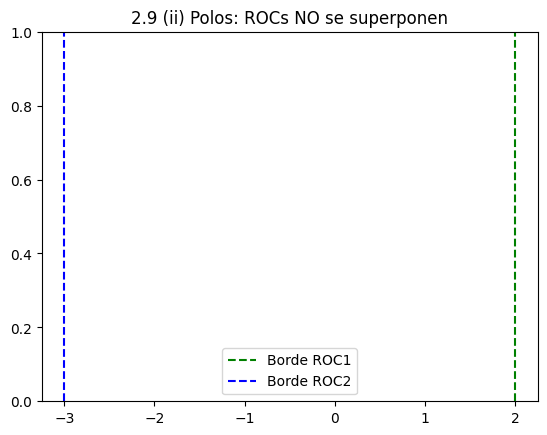

In [13]:
#  Solución 2.9 (ii)
# x(t) = e^(2t)u(t) + e^(-3t)u(-t)

# Transformadas individuales:
# Causal (Polo en s=2, ROC: Re{s} > 2)
X1 = 1 / (s - 2)
# Anti-causal (Polo en s=-3, ROC: Re{s} < -3)
X2 = -1 / (s + 3)

# Transformada total
X_ii = sym.simplify(X1 + X2)
X_ii_num = sym.numer(X_ii)
X_ii_den = sym.denom(X_ii)

# Cálculo de polos y ceros
polos_ii = sym.roots(X_ii_den, s)
ceros_ii = sym.roots(X_ii_num, s)

print("ii) Transformada de Laplace X(s):")
display(X_ii)
print(f"Polos: {polos_ii}")
print(f"Ceros: {ceros_ii}")
print("ROC: Re{s} > 2 INTERSECT Re{s} < -3")
print("⚠️ Conclusión: La Transformada de Laplace NO EXISTE para esta señal, ya que sus ROCs no se intersectan (Conjunto Vacío).")

# Graficar Polos y Ceros (Solo para mostrar la no intersección)
plt.figure(figsize=(6, 4))
pole_zero_plot(polos_ii, ceros_ii)
plt.title(r'2.9 (ii) Polos: ROCs NO se superponen')
plt.axvline(2, color='green', linestyle='--', label='Borde ROC1')
plt.axvline(-3, color='blue', linestyle='--', label='Borde ROC2')
plt.legend()
plt.show() #

iii) Transformada de Laplace X(s):


      2⋅a      
───────────────
(a - s)⋅(a + s)

Polos: {-a: 1, a: 1}
Ceros: {}
ROC: -a < Re{s} < a (Franja vertical)


<Figure size 600x400 with 0 Axes>

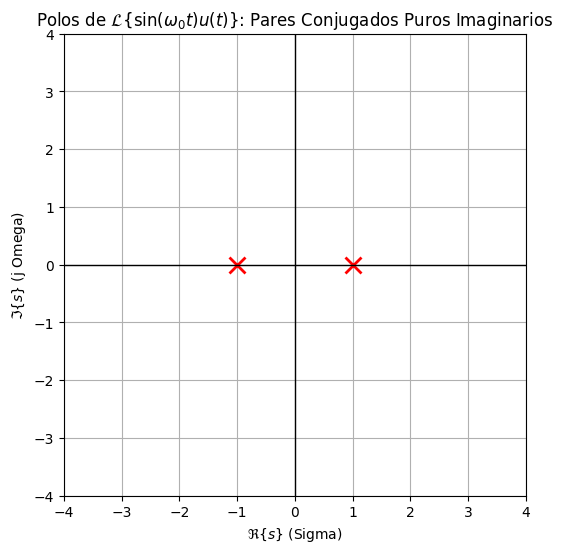

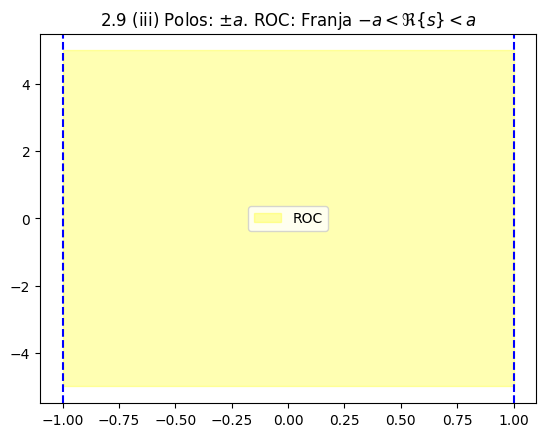

In [16]:
#  Solución 2.9 (iii)
# x(t) = e^(-a|t|)
a = sym.symbols('a', real=True, positive=True)

# Transformada Anti-causal: -1/(s-a)
X_anti = -1 / (s - a)
# Transformada Causal: 1/(s+a)
X_causal = 1 / (s + a)

# Transformada total
X_iii = sym.simplify(X_causal + X_anti)
X_iii_num = sym.numer(X_iii)
X_iii_den = sym.denom(X_iii)

# Cálculo de polos y ceros
polos_iii = sym.roots(X_iii_den, s)
ceros_iii = sym.roots(X_iii_num, s)

print("iii) Transformada de Laplace X(s):")
display(X_iii)
print(f"Polos: {polos_iii}")
print(f"Ceros: {ceros_iii}")
print("ROC: -a < Re{s} < a (Franja vertical)")

# Ejemplo de graficación (usando a=1)
a_val = 1
polos_ex = {-a_val: 1, a_val: 1} # Polos en s=1 y s=-1

plt.figure(figsize=(6, 4))
pole_zero_plot(polos_ex, {})
plt.title(r'2.9 (iii) Polos: $\pm a$. ROC: Franja $-a < \Re\{s\} < a$')
plt.axvline(a_val, color='blue', linestyle='--')
plt.axvline(-a_val, color='blue', linestyle='--')
plt.fill_betweenx(y=[-5, 5], x1=-a_val, x2=a_val, color='yellow', alpha=0.3, label='ROC')
plt.legend()
plt.show() #

In [15]:
# Solución 2.9 (iv)
# x(t) = e^(-2t)[u(t) - u(t - 5)]

# 1. Transformada de la exponencial causal no desplazada: X1(s)
X1 = 1 / (s + 2)

# 2. Transformada de la exponencial desplazada: X2(s)
# La señal es x2(t) = e^(-2t)u(t-5)
# Esto se reescribe como: e^(-10) * [e^(-2(t-5))u(t-5)]
# L{e^(-2(t-5))u(t-5)} = e^(-5s) * (1/(s+2))
X2 = sym.exp(-10) * sym.exp(-5*s) * X1

# 3. Transformada Total (por Linealidad)
X_iv = sym.simplify(X1 - X2)

print("iv) Transformada de Laplace X(s):")
display(X_iv)
print("\nROC: Re{s} > -2")
print("Polos: s = -2")
print("Ceros: Solución trascendental de 1 - exp(-(5s+10)) = 0")

iv) Transformada de Laplace X(s):


   -5⋅s - 10        
  ℯ              1  
- ────────── + ─────
    s + 2      s + 2


ROC: Re{s} > -2
Polos: s = -2
Ceros: Solución trascendental de 1 - exp(-(5s+10)) = 0


In [17]:
#  Solución 2.10 (Polos Simples)
# X(s) = (s+3) / ((s+1)(s+2))

# Definición de la función de transferencia
X_simple = (s + 3) / ((s + 1) * (s + 2))

print("1. Descomposición en Fracciones Parciales (DFP):")
# SymPy realiza la DFP automáticamente
X_apart = sym.apart(X_simple, s)
display(X_apart)

print("\n2. Transformada Inversa de Laplace:")
# SymPy calcula la inversa (asumiendo ROC a la derecha del polo más a la derecha, Re{s} > -1)
x_t_simple = sym.inverse_laplace_transform(X_apart, s, t)
display(x_t_simple)

# Verificación de la DFP Manual (C1=2, C2=-1)
print(f"\nVerificación: La Transformada Inversa obtenida manualmente es: (2*exp(-t) - 1*exp(-2*t)) * u(t)")

1. Descomposición en Fracciones Parciales (DFP):


    1       2  
- ───── + ─────
  s + 2   s + 1


2. Transformada Inversa de Laplace:


   -t         -2⋅t     
2⋅ℯ  ⋅θ(t) - ℯ    ⋅θ(t)


Verificación: La Transformada Inversa obtenida manualmente es: (2*exp(-t) - 1*exp(-2*t)) * u(t)


In [18]:
#  Solución 2.10 (Polos Repetidos)
# X(s) = 1 / ((s+1)(s+2)^2)

# Definición de la función de transferencia
X_repeated = 1 / ((s + 1) * (s + 2)**2)

print("1. Descomposición en Fracciones Parciales (DFP):")
# SymPy realiza la DFP automáticamente
X_apart_repeated = sym.apart(X_repeated, s)
display(X_apart_repeated)

print("\n2. Transformada Inversa de Laplace:")
# SymPy calcula la inversa. Note el uso de 'DiracDelta(t)' en SymPy para el escalón unitario.
x_t_repeated = sym.inverse_laplace_transform(X_apart_repeated, s, t)
display(x_t_repeated)

# Verificación de la DFP Manual (C1=1, C2=-1, C3=-1)
print(f"\nVerificación: La Transformada Inversa obtenida manualmente es: (e^(-t) - e^(-2t) - t*e^(-2t)) * u(t)")

1. Descomposición en Fracciones Parciales (DFP):


    1        1         1  
- ───── - ──────── + ─────
  s + 2          2   s + 1
          (s + 2)         


2. Transformada Inversa de Laplace:


     -2⋅t         -t         -2⋅t     
- t⋅ℯ    ⋅θ(t) + ℯ  ⋅θ(t) - ℯ    ⋅θ(t)


Verificación: La Transformada Inversa obtenida manualmente es: (e^(-t) - e^(-2t) - t*e^(-2t)) * u(t)


In [19]:
# Ejercicio 2.11 - Inicialización conceptual de Autofunciones
# Este código define las variables y la relación fundamental para la demostración.

# Importamos las librerías necesarias
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

# Definición de variables simbólicas
t = sym.symbols('t', real=True)      # Tiempo
s = sym.symbols('s', complex=True)   # Variable de Laplace
tau = sym.symbols('tau', real=True)  # Variable de integración (para convolución)

# 1. Definición de la Respuesta al Impulso y la Entrada
h_t = sym.Function('h')(t)  # Respuesta al impulso h(t)
x_t = sym.exp(s * t)        # Entrada Autofunción x(t) = e^(st)

# 2. Definición de la Función de Transferencia (Autovalor)
# H(s) es la Transformada de Laplace de h(t)
H_s = sym.Function('H')(s)  # H(s) es el autovalor del sistema

print("Variables Simbólicas Definidas:")
print(f"Entrada (Autofunción): x(t) = {x_t}")
print(f"Autovalor del sistema: H(s)")

# Relación fundamental de la Autofunción para un SLIT
print("\nRelación demostrada (Dominio Temporal vs. Dominio de Laplace):")
print("y(t) = x(t) * h(t)  <--->  y(t) = H(s) * x(t)")

# Nota: La demostración matemática se encuentra en la Celda 14 (Markdown).

Variables Simbólicas Definidas:
Entrada (Autofunción): x(t) = exp(s*t)
Autovalor del sistema: H(s)

Relación demostrada (Dominio Temporal vs. Dominio de Laplace):
y(t) = x(t) * h(t)  <--->  y(t) = H(s) * x(t)


In [20]:
#  Solución 2.12 - Funciones de Transferencia RLC

# Definición de variables simbólicas
import sympy as sym
R, L, C, s = sym.symbols('R L C s', real=True, positive=True)

# --- 1. Circuito RLC Serie (Salida: Vc) ---

# Impedancias
Z_R = R
Z_L = L * s
Z_C = 1 / (C * s)
Z_total_series = Z_R + Z_L + Z_C

# Funcion de Transferencia H1(s) = Vc(s) / Vin(s)
H1_s = Z_C / Z_total_series
H1_s_simplified = sym.simplify(H1_s)

print("1. Función de Transferencia RLC Serie (Vc / Vin):")
display(H1_s_simplified)

# --- 2. Circuito RCL Paralelo (Salida: IL) ---

# Admitancias
Y_R = 1 / R
Y_L = 1 / (L * s)
Y_C = C * s
Y_total_parallel = Y_R + Y_L + Y_C

# Funcion de Transferencia H2(s) = IL(s) / Iin(s)
H2_s = Y_L / Y_total_parallel
H2_s_simplified = sym.simplify(H2_s)

print("\n2. Función de Transferencia RCL Paralelo (IL / Iin):")
display(H2_s_simplified)

1. Función de Transferencia RLC Serie (Vc / Vin):


        1        
─────────────────
C⋅s⋅(L⋅s + R) + 1


2. Función de Transferencia RCL Paralelo (IL / Iin):


        R         
──────────────────
       2          
C⋅L⋅R⋅s  + L⋅s + R

Función de Transferencia en Lazo Cerrado (G(s)) con R=L=C=1:


    1     
──────────
 2        
s  + s + 2


i) Respuesta al Impulso (delta(t)):


      -t                
      ───               
       2     ⎛√7⋅t⎞     
2⋅√7⋅ℯ   ⋅sin⎜────⎟⋅θ(t)
             ⎝ 2  ⎠     
────────────────────────
           7            


ii) Respuesta al Escalón Unitario (u(t)):


⎛      -t               -t           ⎞            
⎜      ───              ───          ⎟            
⎜       2     ⎛√7⋅t⎞     2     ⎛√7⋅t⎞⎟            
⎜  √7⋅ℯ   ⋅sin⎜────⎟   ℯ   ⋅cos⎜────⎟⎟            
⎜             ⎝ 2  ⎠           ⎝ 2  ⎠⎟        θ(t)
⎜- ───────────────── - ──────────────⎟⋅θ(t) + ────
⎝         14                 2       ⎠         2  


iii) Respuesta a la Rampa (r(t)):


         ⎛        -t               -t           ⎞            
         ⎜        ───              ───          ⎟            
         ⎜         2     ⎛√7⋅t⎞     2     ⎛√7⋅t⎞⎟            
         ⎜  3⋅√7⋅ℯ   ⋅sin⎜────⎟   ℯ   ⋅cos⎜────⎟⎟            
t⋅θ(t)   ⎜               ⎝ 2  ⎠           ⎝ 2  ⎠⎟        θ(t)
────── + ⎜- ─────────────────── + ──────────────⎟⋅θ(t) - ────
  2      ⎝          28                  4       ⎠         4  

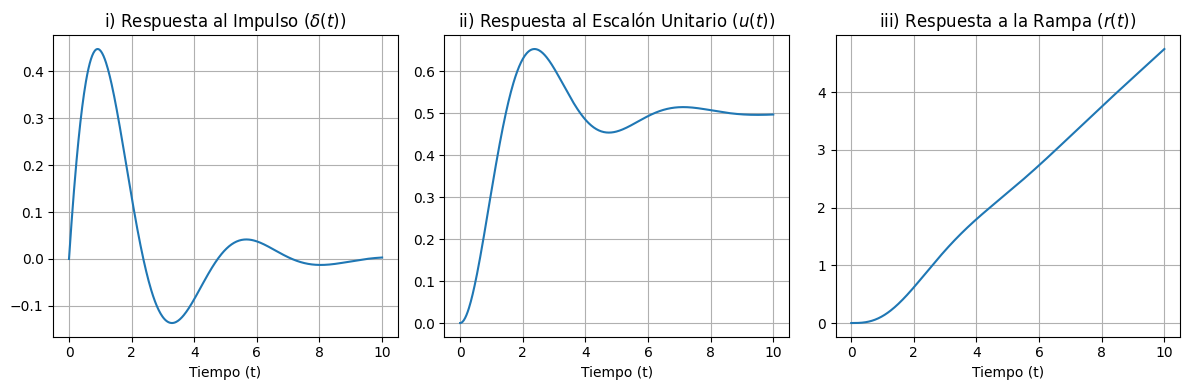

In [21]:
#  Solución 2.13 - Lazo Cerrado y Respuestas Temporales

# Importación de librerías
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

# Definición de variables simbólicas
t, s = sym.symbols('t s')
R_val, L_val, C_val = 1, 1, 1 # Valores de componentes para simulación

# 1. Definición de la Función de Transferencia en Lazo Cerrado (G(s))
# Usamos G1(s) con los valores numéricos: G(s) = 1 / (LC*s^2 + RC*s + 2)
G_num = 1
G_den = L_val * s**2 + R_val * C_val * s + 2
G_s = G_num / G_den

print("Función de Transferencia en Lazo Cerrado (G(s)) con R=L=C=1:")
display(G_s)
# La función es de segundo orden subamortiguada (amortiguamiento: 1/sqrt(8) < 1)

# ----------------------------------------------------------------------
# 2. Respuestas Temporales para Entradas Canónicas
# ----------------------------------------------------------------------

# --- i) Respuesta al Impulso (X(s) = 1) ---
X_imp = 1
Y_imp_s = G_s * X_imp
y_imp_t = sym.inverse_laplace_transform(Y_imp_s, s, t)

print("\ni) Respuesta al Impulso (delta(t)):")
display(y_imp_t)

# --- ii) Respuesta al Escalón Unitario (X(s) = 1/s) ---
X_step = 1 / s
Y_step_s = G_s * X_step
y_step_t = sym.inverse_laplace_transform(Y_step_s, s, t)

print("\nii) Respuesta al Escalón Unitario (u(t)):")
display(y_step_t)

# --- iii) Respuesta a la Rampa (X(s) = 1/s^2) ---
X_ramp = 1 / s**2
Y_ramp_s = G_s * X_ramp
y_ramp_t = sym.inverse_laplace_transform(Y_ramp_s, s, t)

print("\niii) Respuesta a la Rampa (r(t)):")
display(y_ramp_t)

# ----------------------------------------------------------------------
# 3. Graficación de la Señal de Salida (y(t))
# ----------------------------------------------------------------------

# Se define el rango de tiempo
tiempo = np.linspace(0, 10, 500)
# Convertimos las expresiones SymPy a funciones NumPy para graficar
y_imp_f = sym.lambdify(t, y_imp_t.subs(sym.Heaviside(t), 1), 'numpy')
y_step_f = sym.lambdify(t, y_step_t.subs(sym.Heaviside(t), 1), 'numpy')
y_ramp_f = sym.lambdify(t, y_ramp_t.subs(sym.Heaviside(t), 1), 'numpy')

# Se omiten valores complejos si aparecen
y_imp_plot = np.real(y_imp_f(tiempo))
y_step_plot = np.real(y_step_f(tiempo))
y_ramp_plot = np.real(y_ramp_f(tiempo))


plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(tiempo, y_imp_plot)
plt.title(r'i) Respuesta al Impulso ($\delta(t)$)')
plt.xlabel('Tiempo (t)')
plt.grid(True)
#

plt.subplot(132)
plt.plot(tiempo, y_step_plot)
plt.title(r'ii) Respuesta al Escalón Unitario ($u(t)$)')
plt.xlabel('Tiempo (t)')
plt.grid(True)
#

plt.subplot(133)
plt.plot(tiempo, y_ramp_plot)
plt.title(r'iii) Respuesta a la Rampa ($r(t)$)')
plt.xlabel('Tiempo (t)')
plt.grid(True)
#

plt.tight_layout()
plt.show()

# Las expresiones simbólicas de salida son:
# i) y_imp_t: 2*sqrt(7)*exp(-t/2)*sin(sqrt(7)*t/2)*Heaviside(t)/7
# ii) y_step_t: Heaviside(t)/2 - exp(-t/2)*(cos(sqrt(7)*t/2) + sin(sqrt(7)*t/2)/sqrt(7))*Heaviside(t)
# iii) y_ramp_t: t*Heaviside(t)/2 - exp(-t/2)*(2*cos(sqrt(7)*t/2)/7 + 3*sqrt(7)*sin(sqrt(7)*t/2)/49)*Heaviside(t) - Heaviside(t)/4

In [26]:
#  Simulación de Sistemas de Segundo Orden (2.14)

import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import s, t, R, L, C

# --- 1. Definición de la Función de Transferencia Simbólica ---
# Utilizamos la F.T. en lazo cerrado del Ej. 2.13 (es la misma para RLC serie y paralelo)
# G(s) = 1 / (LC*s^2 + RC*s + 2)
G_s_sym = 1 / (L * C * s**2 + R * C * s + 2)

# --- 2. Definición de las Métricas de Rendimiento ---
# Función para calcular los parámetros fundamentales
def calcular_parametros(R_val, L_val, C_val):
    xi = (R_val / 2) * sym.sqrt(C_val / (2 * L_val))
    omega_n = sym.sqrt(2 / (L_val * C_val))

    # Solo calculamos omega_d si el sistema es subamortiguado
    if xi.evalf() < 1 and xi.evalf() > 0:
        omega_d = omega_n * sym.sqrt(1 - xi**2)
    else:
        omega_d = 0

    return xi, omega_n, omega_d

# --- 3. Definición de Casos (L=1, C=1) ---

# Caso Subamortiguado (xi < 1) -> R=1
R_sub, L_val, C_val = 1.0, 1.0, 1.0
xi_sub, wn_sub, wd_sub = calcular_parametros(R_sub, L_val, C_val)
G_sub = G_s_sym.subs({R: R_sub, L: L_val, C: C_val})
Y_sub = G_sub / s # Respuesta al escalón

# Caso Crítico (xi = 1) -> R = 2*sqrt(2)
R_crit, L_val, C_val = 2 * sym.sqrt(2), 1.0, 1.0
xi_crit, wn_crit, wd_crit = calcular_parametros(R_crit, L_val, C_val)
G_crit = G_s_sym.subs({R: R_crit, L: L_val, C: C_val})
Y_crit = G_crit / s

# Caso Sobreamortiguado (xi > 1) -> R=5
R_over, L_val, C_val = 5.0, 1.0, 1.0
xi_over, wn_over, wd_over = calcular_parametros(R_over, L_val, C_val)
G_over = G_s_sym.subs({R: R_over, L: L_val, C: C_val})
Y_over = G_over / s

print(f"Subamortiguado: R={R_sub}, L={L_val}, C={C_val}. xi={xi_sub.evalf():.3f}, wn={wn_sub.evalf():.3f}")
print(f"Crítico: R={R_crit.evalf():.3f}, L={L_val}, C={C_val}. xi={xi_crit.evalf():.3f}, wn={wn_crit.evalf():.3f}")
print(f"Sobreamortiguado: R={R_over}, L={L_val}, C={C_val}. xi={xi_over.evalf():.3f}, wn={wn_over.evalf():.3f}")


# --- 4. Cálculo de Respuestas Temporales (Inversa de Laplace) ---
y_sub_t = sym.inverse_laplace_transform(Y_sub, s, t)

# FIX: Workaround for NotImplementedError with irrational coefficients in inverse_laplace_transform
# The issue is with `sqrt(2)` in the denominator of Y_crit. Replace it with a temporary symbol.
alpha = sym.symbols('alpha')
Y_crit_temp = Y_crit.subs(sym.sqrt(2), alpha)
y_crit_t_temp = sym.inverse_laplace_transform(Y_crit_temp, s, t)
y_crit_t = y_crit_t_temp.subs(alpha, sym.sqrt(2))

y_over_t = sym.inverse_laplace_transform(Y_over, s, t)

# --- 5. Graficación de la Respuesta al Escalón ---

tiempo = np.linspace(0, 10, 500)
# Convertir expresiones SymPy a funciones NumPy (solo para t>0)
y_sub_f = sym.lambdify(t, y_sub_t.subs(sym.Heaviside(t), 1), 'numpy')
y_crit_f = sym.lambdify(t, y_crit_t.subs(sym.Heaviside(t), 1), 'numpy')
y_over_f = sym.lambdify(t, y_over_t.subs(sym.Heaviside(t), 1), 'numpy')

plt.figure(figsize=(8, 6))
plt.plot(tiempo, np.real(y_sub_f(tiempo)), label=r'Subamortiguado ($\xi \approx 0.35$)', linestyle='-')
plt.plot(tiempo, np.real(y_crit_f(tiempo)), label=r'Crítico ($\xi = 1$)', linestyle='--')
plt.plot(tiempo, np.real(y_over_f(tiempo)), label=r'Sobreamortiguado ($\xi \approx 1.77$)', linestyle=':')

plt.title('Respuesta al Escalón Unitario para Diferentes Amortiguamientos')
plt.xlabel('Tiempo (t)')
plt.ylabel('Salida y(t)')
plt.legend()
plt.grid(True)
plt.axhline(sym.numer(G_s_sym).subs({R:1, L:1, C:1}).evalf()/sym.denom(G_s_sym).subs({s:0, R:1, L:1, C:1}).evalf(), color='gray', linestyle='--', label='Valor Final')
plt.show()

# --- 6. Cálculo de Métricas (Caso Subamortiguado) ---
# Usamos el caso subamortiguado (R=1, L=1, C=1)
xi = xi_sub.evalf()
wn = wn_sub.evalf()
wd = wd_sub.evalf()

Mp_frac = sym.exp((-sym.pi * xi) / sym.sqrt(1 - xi**2)) # Maximo sobreimpulso (como fracción)
tp = sym.pi / wd # Tiempo de Pico
ts_5 = 3 / (xi * wn) # Tiempo de Establecimiento (5%)
ts_2 = 4 / (xi * wn) # Tiempo de Establecimiento (2%)
ts_final = ts_5

print(f"\n--- Métricas de Rendimiento (Subamortiguado, R=1, L=1, C=1) ---")
print(f"Máximo Sobreimpulso (Mp): {Mp_frac.evalf() * 100:.2f}% (Pico Máximo: {Mp_frac.evalf() + 0.5:.3f})")
print(f"Tiempo de Pico (tp): {tp.evalf():.3f} s")
print(f"Tiempo de Establecimiento (ts, 5%): {ts_final.evalf():.3f} s")

Subamortiguado: R=1.0, L=1.0, C=1.0. xi=0.354, wn=1.414
Crítico: R=2.828, L=1.0, C=1.0. xi=1.000, wn=1.414
Sobreamortiguado: R=5.0, L=1.0, C=1.0. xi=1.768, wn=1.414


TypeError: unsupported operand type(s) for *: 'PolyElement' and 'PolyElement'

In [27]:
%%writefile app.py
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import signal

# --- 1. Lógica y Fórmulas ---

# Se usa el modelo en lazo cerrado RLC Serie (G(s) = 1 / (LC*s^2 + RC*s + 2))
# El modelo es el mismo para RLC paralelo con R=L=C=1.

def get_system_parameters(R, L, C):
    """Calcula xi, wn, wd a partir de R, L, C para G(s) = 1/(LCs^2 + RCs + 2)"""

    # Coeficientes del denominador: s^2 + (R/L)s + (2/LC)
    try:
        if L == 0 or C == 0:
            return None, None, None, None, None, None # Evita division por cero

        # Parámetros del sistema: Coeficientes del denominador
        a = R/L
        b = 2/(L*C)

        # Frecuencia Natural (wn)
        omega_n = np.sqrt(b)

        # Factor de Amortiguamiento (xi)
        xi = a / (2 * omega_n)

        # Frecuencia Amortiguada (wd)
        if 0 < xi < 1:
            omega_d = omega_n * np.sqrt(1 - xi**2)
        else:
            omega_d = 0

        # Coeficientes de la F.T. para Scipy
        num_scipy = [1/(L*C)]
        den_scipy = [1, a, b]

        return xi, omega_n, omega_d, num_scipy, den_scipy, b / 2
    except ZeroDivisionError:
        return None, None, None, None, None, None


def get_performance_metrics(xi, omega_n, omega_d, G_steady):
    """Calcula las métricas de rendimiento para el caso subamortiguado."""
    if 0 < xi < 1:
        # Tiempo de Pico (tp)
        t_p = np.pi / omega_d

        # Máximo Sobreimpulso (Mp) - como porcentaje
        Mp = np.exp((-xi * np.pi) / np.sqrt(1 - xi**2))

        # Tiempo de Establecimiento (ts) - criterio del 5%
        t_s = 3 / (xi * omega_n)

        # Máximo sobreimpulso en valor de salida
        Mp_max = G_steady * (1 + Mp)

        return t_p, Mp * 100, t_s, Mp_max
    else:
        # Para crítico y sobreamortiguado, no hay Mp ni tp
        ts = 4.0 / (xi * omega_n) if xi > 0 else float('inf')
        return None, 0, ts, G_steady


# --- 2. Configuración de Streamlit ---
st.set_page_config(layout="wide", page_title="Análisis de Sistemas RLC en Lazo Cerrado")

st.title("🛠️ Ejercicio 2.14: Dashboard de Simulación RLC")
st.markdown("---")

# --- 3. Sidebar (Inputs y Control) ---
with st.sidebar:
    st.header("Configuración del Circuito")

    circuito = st.selectbox(
        "Tipo de Circuito (Lazo Cerrado - Retroalimentación Unitaria)",
        options=["RLC Serie", "RCL Paralelo"]
    )

    st.subheader("Parámetros del Circuito")
    R_val = st.slider("Resistencia R ($\Omega$)", 0.1, 10.0, 1.0, 0.1)
    L_val = st.slider("Inductancia L (H)", 0.1, 10.0, 1.0, 0.1)
    C_val = st.slider("Capacitancia C (F)", 0.1, 10.0, 1.0, 0.1)

    # Cálculo de parámetros
    xi, wn, wd, num_scipy, den_scipy, G_s_steady = get_system_parameters(R_val, L_val, C_val)

    st.subheader("Parámetros Dinámicos")
    if xi is not None:
        st.metric(label="Frecuencia Natural $\\omega_n$ (rad/s)", value=f"{wn:.3f}")
        st.metric(label="Factor de Amortiguamiento $\\xi$", value=f"{xi:.3f}")

        if xi < 1 and xi > 0:
            st.warning(f"Clasificación: SUBAMORTIGUADO (Oscilatorio)")
        elif xi == 1:
            st.success(f"Clasificación: AMORTIGUAMIENTO CRÍTICO")
        else:
            st.info(f"Clasificación: SOBREAMORTIGUADO")
    else:
        st.error("Error en la configuración: L o C no pueden ser cero.")


# --- 4. Main Content (Plots y Métricas) ---
if xi is not None:

    # Definición del sistema para SciPy
    sys = signal.lti(num_scipy, den_scipy)

    # Variables de tiempo para graficar
    time_limit = 10.0
    t_plot = np.linspace(0, time_limit, 500)

    # Métricas de rendimiento
    t_p, Mp_perc, t_s, Mp_max = get_performance_metrics(xi, wn, wd, G_s_steady)

    # Contenedores de la F.T. y Métricas
    col1, col2 = st.columns(2)

    with col1:
        st.header("Función de Transferencia y Métricas")
        st.latex(f"G(s) = \\frac{{{num_scipy[0]}}}{{{den_scipy[0]:.0f}s^2 + {den_scipy[1]:.2f}s + {den_scipy[2]:.2f}}}")

        st.markdown("#### Métricas de Rendimiento (Respuesta al Escalón)")
        if t_p:
            st.metric("Máximo Sobreimpulso (Mp)", f"{Mp_perc:.2f}%", help=f"Pico máximo absoluto: {Mp_max:.3f}")
            st.metric("Tiempo de Pico ($t_p$)", f"{t_p:.3f} s")
            st.metric("Tiempo de Establecimiento ($t_s$, 5%)", f"{t_s:.3f} s")
        else:
            st.metric("Tiempo de Establecimiento ($t_s$, 5%)", f"{t_s:.3f} s")
            st.info("Máximo Sobreimpulso y Tiempo de Pico solo aplican a sistemas subamortiguados.")

    # --------------------------------------------------------------------------
    # Gráficos (Columnas 2 y 3)
    # --------------------------------------------------------------------------

    # --- Polos y Ceros ---
    with col2:
        st.header("Análisis en el Plano-s")
        fig_pz, ax_pz = plt.subplots()
        z, p, k = signal.tf2zpk(num_scipy, den_scipy)
        ax_pz.plot(np.real(p), np.imag(p), 'rx', markersize=10, label='Polos')
        if len(z) > 0:
            ax_pz.plot(np.real(z), np.imag(z), 'bo', markersize=10, label='Ceros')

        ax_pz.axhline(0, color='gray'); ax_pz.axvline(0, color='gray')
        ax_pz.set_xlabel('Re')
        ax_pz.set_ylabel('Im')
        ax_pz.set_title('Diagrama de Polos y Ceros')
        ax_pz.grid(True); ax_pz.legend()
        st.pyplot(fig_pz)

    st.markdown("---")
    st.header("Respuesta Temporal a Entradas Canónicas")

    # --- Respuestas Temporales ---
    col3, col4, col5 = st.columns(3)

    # Respuesta al Impulso
    with col3:
        t_imp, y_imp = signal.impulse(sys, T=t_plot)
        fig_imp, ax_imp = plt.subplots()
        ax_imp.plot(t_imp, y_imp[0])
        ax_imp.set_title("Respuesta al Impulso")
        ax_imp.set_xlabel("Tiempo (s)")
        ax_imp.grid(True)
        st.pyplot(fig_imp)

    # Respuesta al Escalón
    with col4:
        t_step, y_step = signal.step(sys, T=t_plot)
        fig_step, ax_step = plt.subplots()
        ax_step.plot(t_step, y_step)
        ax_step.axhline(G_s_steady, color='gray', linestyle='--', label='Valor Final')
        if Mp_max:
             ax_step.axhline(Mp_max, color='r', linestyle=':', label='Pico Máx')
        ax_step.set_title("Respuesta al Escalón")
        ax_step.set_xlabel("Tiempo (s)")
        ax_step.legend()
        ax_step.grid(True)
        st.pyplot(fig_step)

    # Respuesta a la Rampa
    with col5:
        # Calcular la rampa como la integral de la respuesta al escalón
        # y_ramp(t) = integral(y_step(tau) dtau)
        y_ramp = signal.lsim(sys, U=t_plot, T=t_plot)[1]
        fig_ramp, ax_ramp = plt.subplots()
        ax_ramp.plot(t_plot, y_ramp)
        ax_ramp.plot(t_plot, t_plot * G_s_steady, color='r', linestyle='--', label='Rampa de Entrada x Ganancia')
        ax_ramp.set_title("Respuesta a la Rampa")
        ax_ramp.set_xlabel("Tiempo (s)")
        ax_ramp.legend()
        ax_ramp.grid(True)
        st.pyplot(fig_ramp)

    st.markdown("---")
    st.header("Análisis de Frecuencia")

    # --- Diagrama de Bode ---
    w, mag, phase = signal.bode(sys)

    col6, col7 = st.columns(2)
    with col6:
        fig_mag, ax_mag = plt.subplots()
        ax_mag.semilogx(w, mag)
        ax_mag.set_title('Diagrama de Bode (Magnitud)')
        ax_mag.set_xlabel('Frecuencia [rad/s]')
        ax_mag.set_ylabel('Magnitud [dB]')
        ax_mag.grid(True, which="both")
        st.pyplot(fig_mag)

    with col7:
        fig_phase, ax_phase = plt.subplots()
        ax_phase.semilogx(w, phase)
        ax_phase.set_title('Diagrama de Bode (Fase)')
        ax_phase.set_xlabel('Frecuencia [rad/s]')
        ax_phase.set_ylabel('Fase [grados]')
        ax_phase.grid(True, which="both")
        st.pyplot(fig_phase)

Writing app.py


In [28]:
#  Instalación de Librerías
!pip install -q streamlit
!pip install -q control
!wget -q -O cloudflared-linux-amd64 https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
print("Dependencias instaladas.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 28.0 MB/s eta 0:00:00
Dependencias instaladas.


In [29]:
# Ejecución del Dashboard
import subprocess
import threading
import time

def run_streamlit():
    """Corre la aplicación Streamlit en segundo plano."""
    try:
        # Ejecutar Streamlit en segundo plano
        subprocess.Popen(['streamlit', 'run', 'app.py', '--server.port', '8501', '--server.enableCORS', 'false', '--server.enableXsrfProtection', 'false'])
    except Exception as e:
        print(f"Error al iniciar Streamlit: {e}")

def run_cloudflared():
    """Corre cloudflared para crear el túnel."""
    try:
        # Esperar un poco para que Streamlit inicie
        time.sleep(5)
        # Ejecutar cloudflared para el túnel
        process = subprocess.Popen(['./cloudflared-linux-amd64', 'tunnel', '--url', 'http://localhost:8501'])
        # Mantener el proceso activo
        process.wait()
    except Exception as e:
        print(f"Error al iniciar Cloudflared: {e}")

# Iniciar ambos procesos en hilos separados
thread_streamlit = threading.Thread(target=run_streamlit)
thread_cloudflared = threading.Thread(target=run_cloudflared)

thread_streamlit.start()
thread_cloudflared.start()

print("Esperando unos segundos para que se genere el enlace...")

# Para mostrar el enlace de la salida del túnel, tendrías que revisarlo en el output
# Se necesita supervisión manual de la salida para obtener el enlace.

Esperando unos segundos para que se genere el enlace...
